## SINIFLANDIRMA (Classification)

### k-NN (En Yakın Komşular) Algoritması

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [4]:
# Eğitim verisi
trn = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_trn.csv")
X_trn = trn.filter(regex='\d')
y_trn = trn.y
# Test verisi
tst = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_tst.csv")
X_tst = tst.filter(regex='\d')
y_tst = tst.y

In [3]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


In [5]:
tst.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.00,0.00,0.0,1.01,0.0,0.0,0.0,0.00,0.00,...,0.000,0.088,0.000,0.000,0.088,0.000,6.718,33,215,1
1,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.098,0.589,0.000,0.000,0.000,0.000,2.044,22,92,1
2,0.0,0.53,0.00,0.0,1.06,0.0,1.6,0.0,0.00,0.53,...,0.000,0.239,0.079,0.159,0.000,0.000,4.555,51,123,1
3,0.0,0.00,0.23,0.0,0.92,0.0,0.0,0.0,0.23,0.00,...,0.000,0.130,0.026,0.026,0.000,0.026,2.222,23,480,0
4,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.428,4,10,0


In [10]:
trn.shape

(3220, 58)

In [11]:
# Sınıf etiketleri
spam = ["Spam Değil", "Spam"]

In [12]:
# kNN Model Eğitimi
knn = KNeighborsClassifier(n_neighbors=5).fit(X_trn,y_trn)

In [13]:
print('Eğitim verisi ile doğruluk oranı: '+str("{:.2%}".format(knn.score(X_trn, y_trn))))

Eğitim verisi ile doğruluk: 86.77%


In [16]:
# Model optimizasyonu (Grid Search)
knn = KNeighborsClassifier()
# Arama parametreleri
param = range(3, 15, 2)
# GridSearchCV
grid = GridSearchCV(knn, {'n_neighbors': param})
# En iyi modeli seç
eniyi_knn = grid.fit(X_trn, y_trn).best_estimator_
# En iyi model parametreleri
eniyi_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

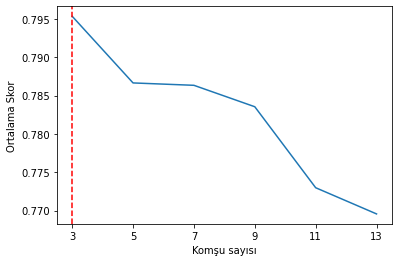

In [20]:
# Komşu sayısı (n_neighbors) parametresine bağlı olarak doğruluk grafiği
plt.plot(param, grid.cv_results_['mean_test_score'])
# grafik özellikleri
plt.xticks(param)
plt.ylabel('Ortalama Skor')
plt.xlabel('Komşu sayısı')
# En iyi parametrenin gösterilmesi
plt.axvline(x=eniyi_knn.n_neighbors, color='red', ls='--')



In [21]:
# Eğitim verisi ile doğruluk oranı
eniyi_knn.score(X_trn,y_trn)

0.8950310559006212

In [22]:
# Test verisi ile doğruluk oranı
eniyi_knn.score(X_tst,y_tst)

0.8117306299782766

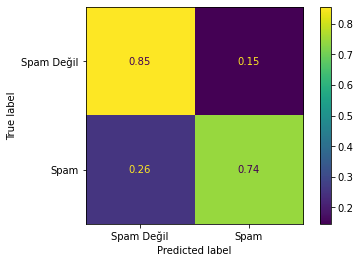

In [23]:
plot_confusion_matrix(eniyi_knn, X_tst, y_tst, display_labels=spam, normalize='true')

## Naive Bayes Sınıflandırması

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [25]:
# Eğitim verisi
trn = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_trn.csv")
X_trn = trn.filter(regex='\d')
y_trn = trn.y
# Test verisi
tst = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_tst.csv")
X_tst = tst.filter(regex='\d')
y_tst = tst.y

In [26]:
# Model oluşturma
nb = GaussianNB().fit(X_trn, y_trn)

In [28]:
print("Model doğruluk oranı (Eğitim verisi ile):"+str("{:.2%}".format(nb.score(X_trn, y_trn))))

Model doğruluk oranı (Eğitim verisi ile):82.20%


In [30]:
print("Model doğruluk oranı (Test verisi ile):"+str("{:.2%}".format(nb.score(X_tst, y_tst))))

Model doğruluk oranı (Test verisi ile):82.04%


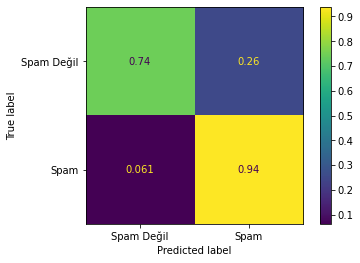

In [31]:
plot_confusion_matrix(nb, X_tst, y_tst, display_labels=spam, normalize='true')

## Karar Ağaçları (Decision Trees)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
# Eğitim verisi
trn = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_trn.csv")
X_trn = trn.filter(regex='\d')
y_trn = trn.y
# Test verisi
tst = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_tst.csv")
X_tst = tst.filter(regex='\d')
y_tst = tst.y

In [34]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


## Karar ağacı modeli için parametreler

### Karar kriteri (criterion): entropy veya gini

### max_leaf_nodes: Karar ağacındaki maksimum node sayısı

In [35]:
# Ağaç Modeli nesnesi
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_leaf_nodes=7)
# Eğitimi verisi ile fit
dt.fit(X_trn,y_trn)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7, random_state=0)

In [37]:
print("Model doğruluk oranı (Eğitim verisi ile):"+str("{:.2%}".format(dt.score(X_trn, y_trn))))

Model doğruluk oranı (Eğitim verisi ile):89.84%


In [46]:
# Parametre optimizasyonu
dt = DecisionTreeClassifier(random_state=1)
# Parametreler
param = range(6, 50, 2)
grid = GridSearchCV(dt, {'max_leaf_nodes': param, 'criterion':['entropy','gini']})
grid.fit(X_trn, y_trn)
eniyi_dt = grid.best_estimator_
# Parametreler
eniyi_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

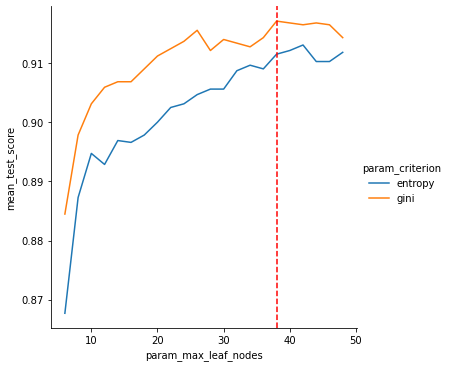

In [47]:
# Farklı parametreler için doğruluk tablosu
sns.relplot(data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'), 
            kind='line', x='param_max_leaf_nodes',y='mean_test_score',hue='param_criterion')
plt.axvline(x=eniyi_dt.max_leaf_nodes, color='red', ls='--')

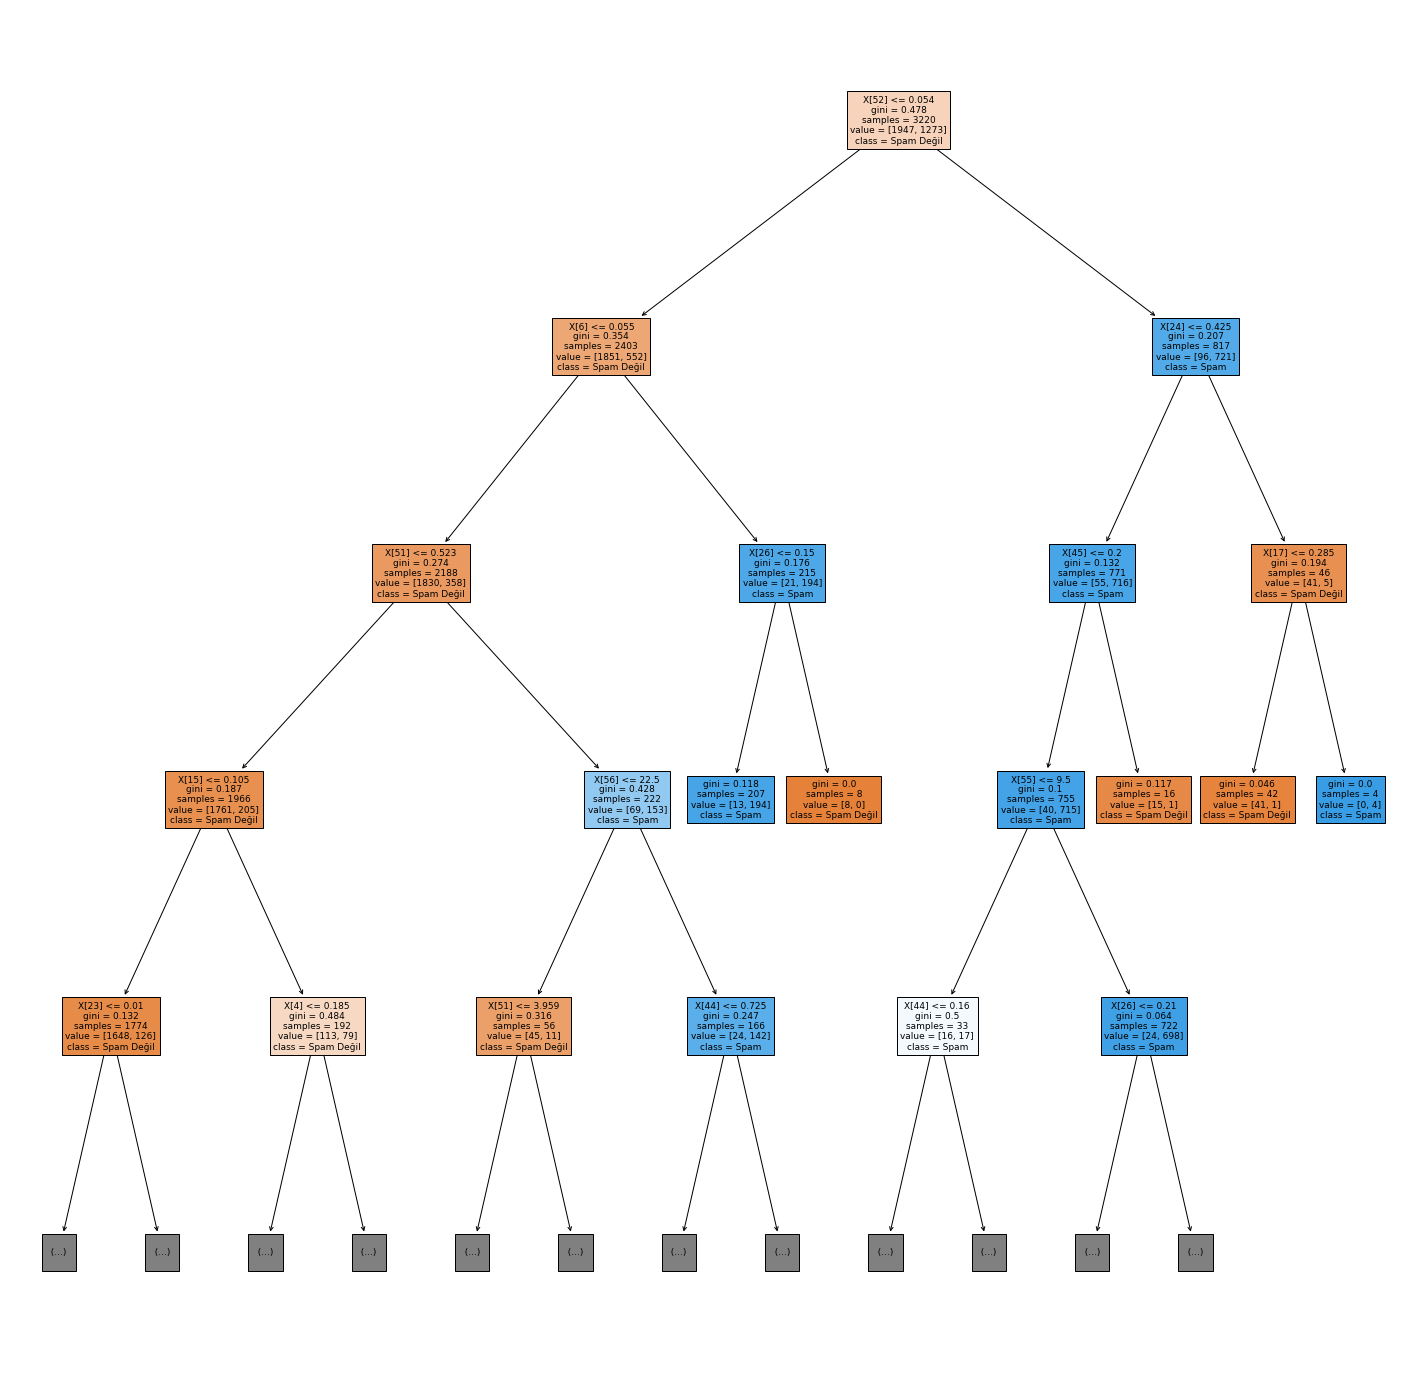

In [49]:
# Karar ağacı çizimi
fig = plt.figure(figsize=(25,25))
t = plot_tree(eniyi_dt, class_names=spam, max_depth=4, filled=True)

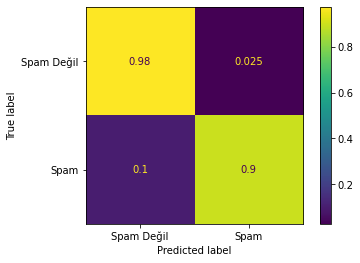

In [53]:
# Karmaşıklık matrisi
plot_confusion_matrix(eniyi_dt, X_trn, y_trn, display_labels=spam, normalize='true')

In [56]:
# Test verisi ile değerlendirme
print("Model doğruluk oranı (Eğitim verisi ile):"+str("{:.2%}".format(eniyi_dt.score(X_tst, y_tst))))

Model doğruluk oranı (Eğitim verisi ile):91.24%


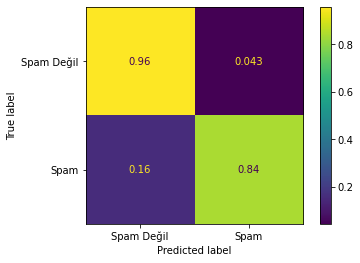

In [57]:
plot_confusion_matrix(eniyi_dt, X_tst, y_tst, display_labels=spam, normalize='true')